In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
def Feature_extracy(data):
    feature_columns = list(data.columns.difference(["평가점수"]))
    y = data.평가점수
    data = data[feature_columns]
    data = data.drop(['이용가능연령구분','카테고리','장르','버전','안드로이드버전'],axis = 1)
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    return data, y

In [4]:
def Applen(data):
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    data = data.drop(['app이름'],axis = 1)
    return data

In [5]:
def Appsize(data):
    data.app크기[data.app크기 == "Varies with device"] = "1M"
    Size = data.app크기.unique()
    
    app_size = []
    # M이 있을 경우에 제외하고 x1024, k있을 경우는 그냥 k만 지우자
    for i in Size:
        if i[-1] == "M":
            temp_data = float(i.replace("M",""))
            temp_data *= 1024
            app_size.append(temp_data)
        else:
            temp_data_2 = float(i.replace("k",""))
            app_size.append(temp_data_2)
            
    dict_app = {}
    for i in range(len(Size)):
        dict_app[Size[i]] = app_size[i]
    
    data['app크기'] = data.app크기.apply(lambda x : dict_app[x])
    
    return data

In [6]:
def Price_adh(data):
    data.가격 = data.가격.apply(lambda x : x.replace("$",""))
    data.가격 = data.가격.apply(lambda x : x.replace(",",""))
    data.가격 = data.가격.apply(lambda x : float(x.replace(",","")))
    return data

In [7]:
def Down_adj(data):
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace("+",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : int(x))
    return data

버전 다듬는 용

In [8]:
def Version_adj(data):
    Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }
    Month = data.마지막업데이트.str.split(' ').str[0]
    Month_data = Month.apply(lambda x : Month_dict[x])
    
    BBB = data.마지막업데이트.str.split(' ').str[1:]
    Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
    Year = BBB.str[1].apply(lambda x : int(x))
    return Month_data, Day, Year

In [9]:
def Update_version(data,Month,Day,Year):
    data = data.drop(['마지막업데이트'],axis = 1)
    data['업데이트_월'] = Month
    data['업데이트_일'] = Day
    data['업데이트_연도'] = Year
    return data

In [10]:
def All_adj(data):
    data = Applen(data)
    data = Appsize(data)
    Month,Day,Year = Version_adj(data)
    data = Update_version(data,Month,Day,Year)
    return data

In [11]:
with open("Teen.pickle",'rb') as f:
    Teen = pickle.load(f)

In [12]:
def Check_appname(data,name):
    Temp_data = data[data.장르 == name]
    Temp2 = Temp_data[['app이름','다운로드수']]
    return Temp2.sort_values(by = "다운로드수",ascending = False)

In [13]:
def Graph(data):
    plt.figure(figsize = (10,40))
    plt.subplot(5,1,1)
    sns.regplot(data.app크기,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,2)
    sns.regplot(data.리_다,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,3)
    sns.regplot(data.app이름길이,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,4)
    sns.regplot(data.가격,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,5)
    sns.regplot(data.업데이트_연도,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})

In [14]:
Check_appname(Teen,"Entertainment")[:60]

,app이름,다운로드수
865,Google Play Games,1000000000
5856,Google Play Games,1000000000
855,Netflix,100000000
888,IMDb Movies & TV,100000000
958,Netflix,100000000
930,IMDb Movies & TV,100000000
903,IMDb Movies & TV,100000000
3889,Netflix,100000000
904,Netflix,100000000
931,Netflix,100000000


In [15]:
Check_appname(Teen,"Action")[:60]

,app이름,다운로드수
1915,Garena Free Fire,100000000
1957,Bus Rush: Subway Edition,100000000
1718,Garena Free Fire,100000000
5417,Mobile Legends: Bang Bang,100000000
10327,Garena Free Fire,100000000
1949,Garena Free Fire,100000000
4145,PUBG MOBILE,50000000
6579,Hungry Shark World,50000000
6845,Kick the Buddy,50000000
6077,Bowmasters,50000000


In [16]:
Check_appname(Teen,"Shopping")[:60]

,app이름,다운로드수
2774,eBay: Buy & Sell this Summer - Discover Deals ...,100000000
4068,eBay: Buy & Sell this Summer - Discover Deals ...,100000000
2662,eBay: Buy & Sell this Summer - Discover Deals ...,100000000
2664,Amazon Shopping,100000000
2763,Amazon Shopping,100000000
2784,eBay: Buy & Sell this Summer - Discover Deals ...,100000000
2756,"AliExpress - Smarter Shopping, Better Living",100000000
2790,"AliExpress - Smarter Shopping, Better Living",100000000
2698,Flipkart Online Shopping App,100000000
4101,Flipkart Online Shopping App,100000000


In [17]:
Check_appname(Teen,"Strategy")[:60]

,app이름,다운로드수
4580,Five Nights at Freddy's 2 Demo,50000000
7515,Clash of Kings : The King Of Fighters version,50000000
4818,Last Empire - War Z: Strategy,50000000
1866,Lords Mobile: Battle of the Empires - Strategy...,50000000
1998,Stick War: Legacy,10000000
5418,Heroes of Order & Chaos,10000000
7525,Battle of Zombies: Clans War,10000000
10687,Zombie Defense,10000000
1867,War and Order,5000000
7751,الفاتحون Conquerors,5000000


In [18]:
Check_appname(Teen,"Role Playing")[:60]

,app이름,다운로드수
1861,Summoners War,50000000
4073,Eternium,10000000
5522,Order & Chaos 2: 3D MMO RPG,10000000
5702,Avakin Life - 3D virtual world,10000000
9379,Crazy Doctor,10000000
5589,Ninja Turtles: Legends,10000000
5524,Dungeon Hunter 5 – Action RPG,10000000
8245,DC Legends: Battle for Justice,10000000
1862,FINAL FANTASY BRAVE EXVIUS,5000000
8034,Cartoon Wars 3,5000000


In [19]:
Check_appname(Teen,"Simulation")[:60]

,app이름,다운로드수
1786,Episode - Choose Your Story,50000000
4798,Vegas Crime Simulator,50000000
9689,Episode - Choose Your Story,50000000
10190,Fallout Shelter,10000000
9731,Operate Now: Hospital,10000000
6978,Train driving simulator,10000000
6079,The Sims™ Mobile,10000000
1845,Fallout Shelter,10000000
5595,Choices: Stories You Play,10000000
5384,The Sims™ FreePlay,10000000


In [20]:
Check_appname(Teen,"Casino")[:60]

,app이름,다운로드수
9599,Zynga Poker – Texas Holdem,50000000
10189,Heart of Vegas™ Slots – Free Slot Casino Games,10000000
9611,Big Fish Casino – Play Slots & Vegas Games,10000000
6999,Slot Machines by IGG,10000000
8432,Texas HoldEm Poker Deluxe,10000000
6340,BLACKJACK!,10000000
8398,DH Texas Poker - Texas Hold'em,10000000
10179,Golden HoYeah Slots - Real Casino Slots,5000000
7017,Bingo by IGG: Top Bingo+Slots!,5000000
10181,FaFaFa™ Gold Casino: Free slot machines,1000000


In [21]:
Teen.shape

(1084, 13)

In [22]:
Teen, y =  Feature_extracy(Teen)

In [23]:
Teen = All_adj(Teen)

In [24]:
def Change(data):
    data.리뷰수 = data.리뷰수.apply(lambda x: int(x))
    data['리_다'] = data.리뷰수 / data.다운로드수
    data= data.drop(['리뷰수','다운로드수'],axis = 1)
    return data

In [25]:
Teen = Change(Teen)

In [26]:
Teen = Teen.drop(['유료구분','업데이트_월','업데이트_일'],axis = 1)

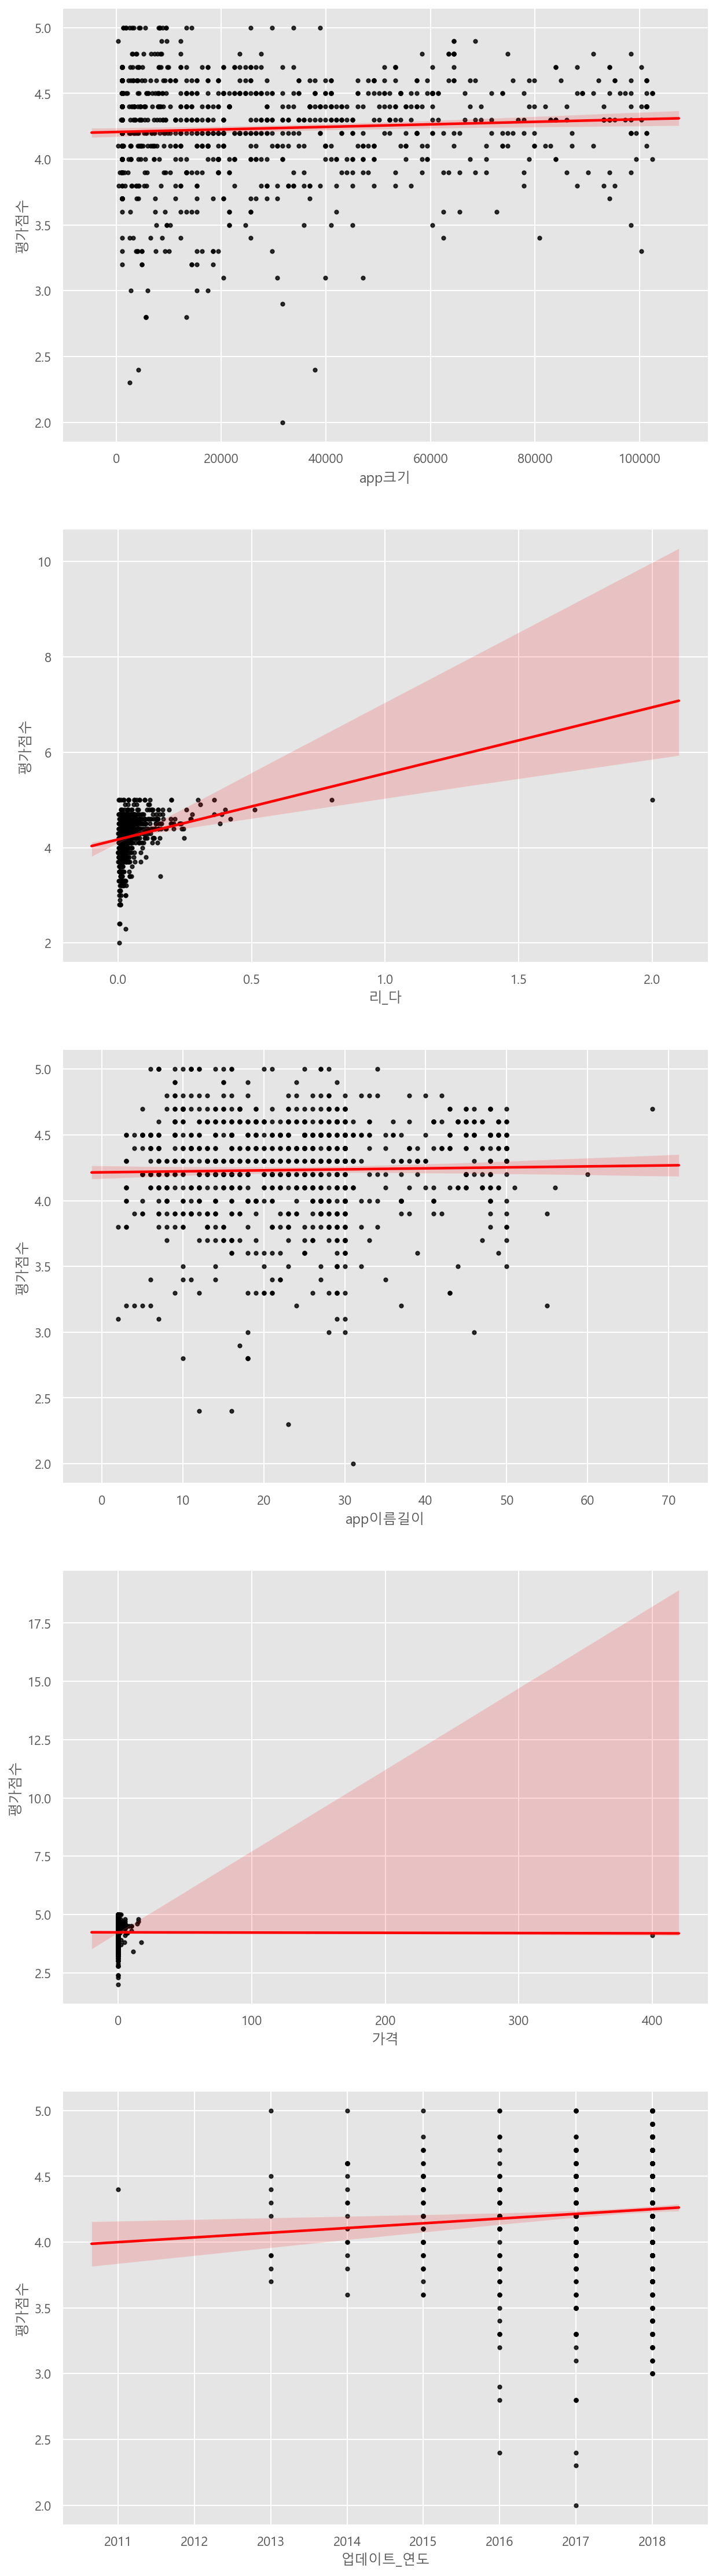

In [27]:
Graph(Teen)

In [28]:
def Distplot(data):
    plt.figure(figsize = (20,30))
    plt.subplot(3,1,1)
    sns.regplot(data.업데이트_월,y)
    
    plt.subplot(3,1,2)
    sns.regplot(data.업데이트_일,y)
    
    plt.subplot(3,1,3)
    sns.regplot(data.업데이트_연도,y)

AttributeError: 'DataFrame' object has no attribute '업데이트_월'

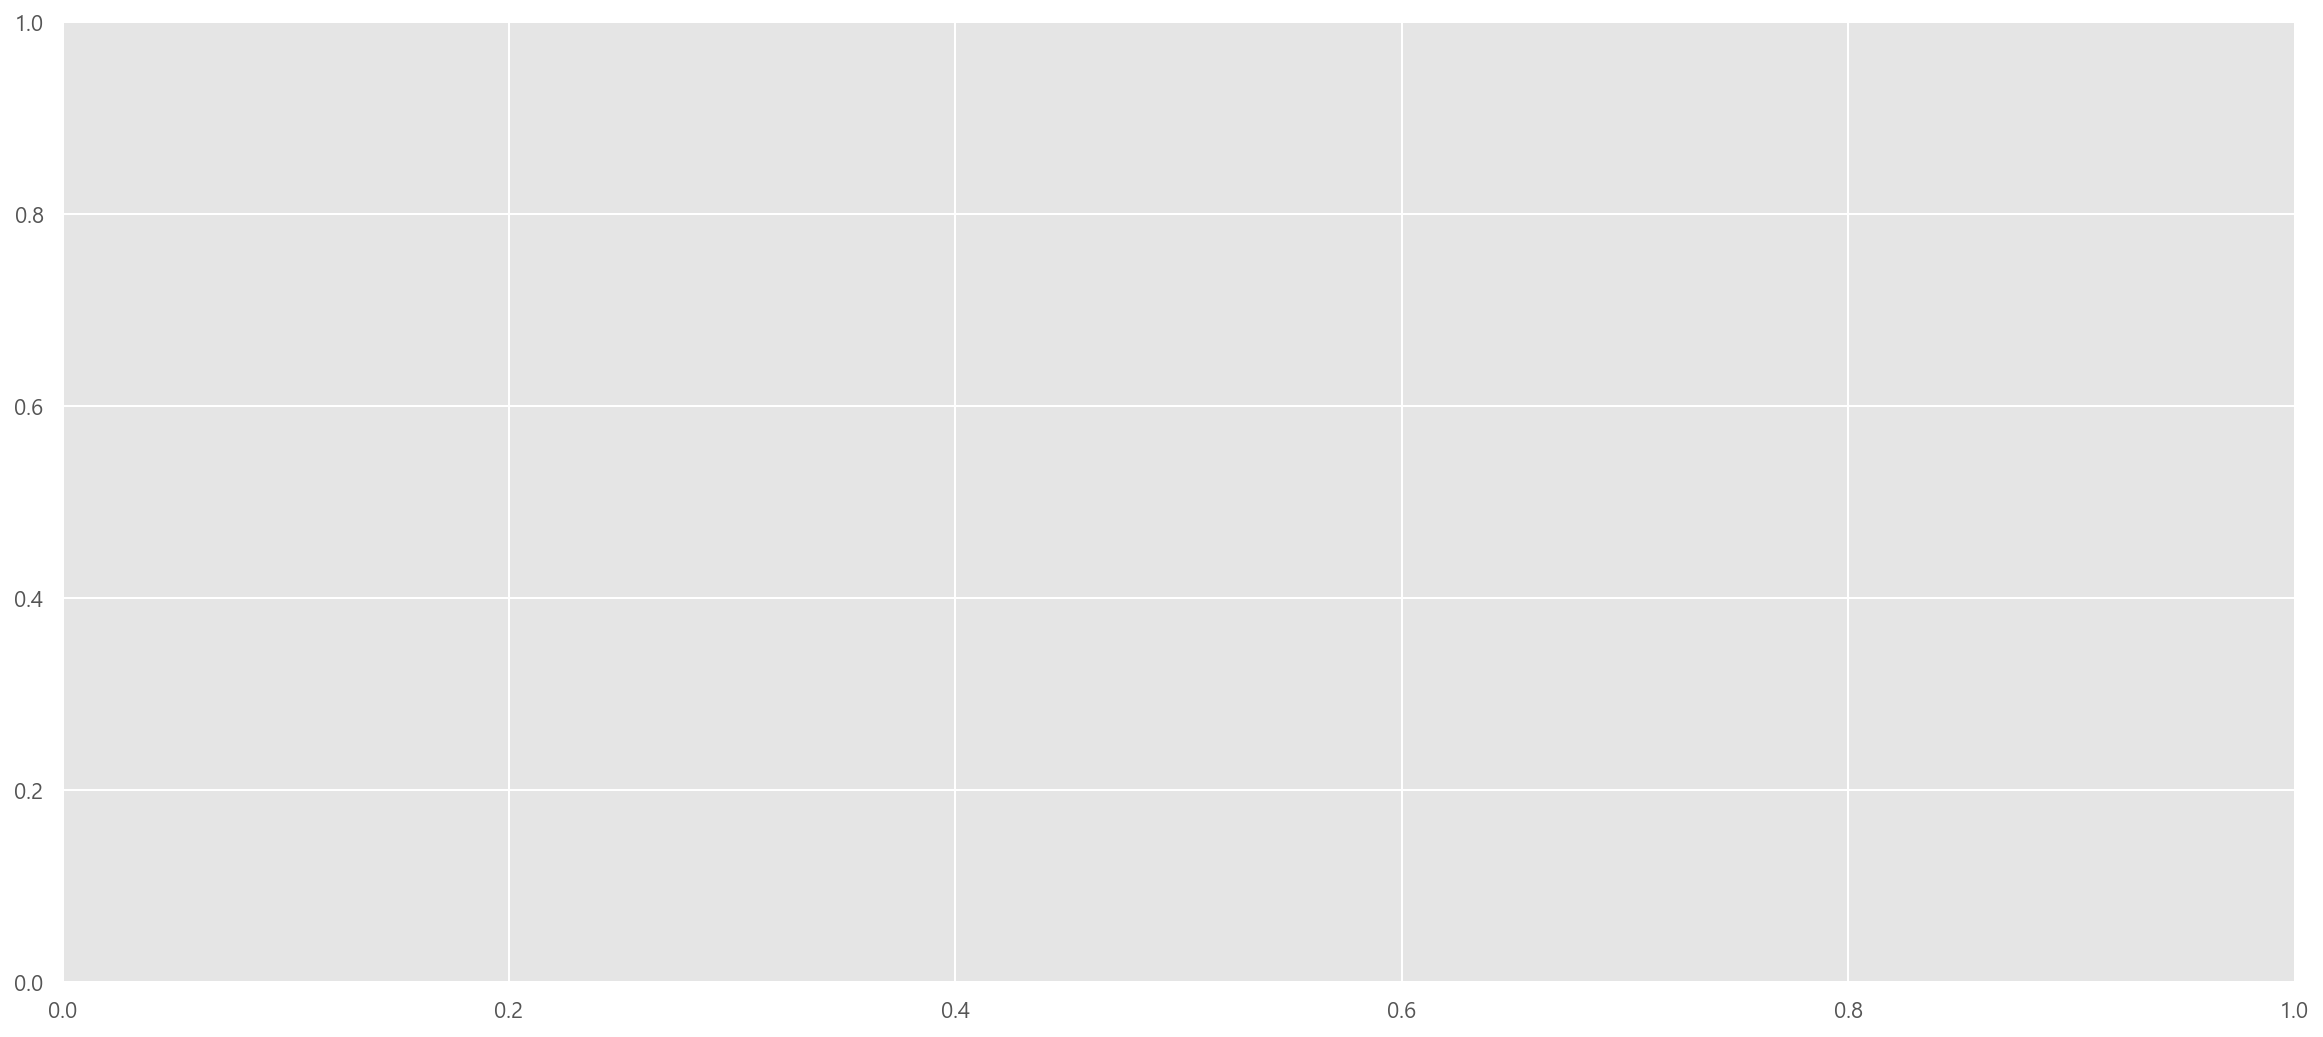

In [29]:
Distplot(Teen)

In [30]:
def Cramer(data):
    from scipy.stats import chi2_contingency
    import numpy as np

    def cramers_V(var1,var2):
        crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
        stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
        obs = np.sum(crosstab) # Number of observations
        mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
        return (stat/(obs*mini))
    from sklearn import preprocessing

    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame() 

    for i in data.columns:
        data_encoded[i]=label.fit_transform(data[i])

    rows= []

    for var1 in data_encoded:
        col = []
        for var2 in data_encoded :
            cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)

    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
    return df

In [31]:
TTT = Teen[['가격','유료구분']]

KeyError: "['유료구분'] not in index"

In [ ]:
Cramer(TTT)

In [ ]:
Teen = Teen.drop(['유료구분'],axis = 1)

In [ ]:
Teen = Teen.drop(['업데이트_일','업데이트_월'],axis = 1)

In [32]:
Teen

,app크기,가격,app이름길이,업데이트_연도,리_다
3,25600.0,0.0,21,2018,0.004313
12,20480.0,0.0,30,2018,0.004483
34,4300.8,0.0,15,2018,0.035300
72,16384.0,0.0,45,2018,0.027192
112,30720.0,0.0,45,2018,0.003740
...,...,...,...,...,...
10803,82944.0,0.0,28,2018,0.056496
10804,17408.0,0.0,12,2018,0.054420
10814,31744.0,0.0,20,2015,0.015700
10819,3686.4,0.0,9,2017,0.010400


In [ ]:
Teen.리뷰수 = Teen.리뷰수.apply(lambda x : int(x))

In [ ]:
Teen['리_다'] = Teen.리뷰수/Teen.다운로드수

In [ ]:
Teen = Teen.drop(['리뷰수','다운로드수'],axis = 1)

In [ ]:
Teen

In [ ]:
sns.regplot(Teen.app이름길이,y)

분석 시작

In [33]:
Teen = sm.add_constant(Teen,has_constant='add')

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [34]:
from sklearn.model_selection import KFold

In [35]:
cv = KFold(4)
score_list = []
for i, (idx_train,idx_test) in enumerate(cv.split(Teen)):
    train_x = Teen.iloc[idx_train]
    train_y = y.reset_index().iloc[idx_train].set_index('index')
    test_x = Teen.iloc[idx_test]
    test_y = y.reset_index().iloc[idx_test].set_index('index')
    model = sm.OLS(train_y,train_x)
    fitted_model = model.fit()
    print(fitted_model.summary())
    predict = fitted_model.predict(test_x)
    score_list.append(mean_squared_error(test_y,predict))

                            OLS Regression Results                            
Dep. Variable:                   평가점수   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     17.36
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           2.38e-16
Time:                        05:06:02   Log-Likelihood:                -383.85
No. Observations:                 813   AIC:                             779.7
Df Residuals:                     807   BIC:                             807.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -52.7699     25.364     -2.081      0.0

크기, 이름길이, 가격을 신경안쓰나보다

In [36]:
Teen = Teen.drop(['app크기','app이름길이','가격'],axis = 1)

In [37]:
Teen

,const,업데이트_연도,리_다
3,1.0,2018,0.004313
12,1.0,2018,0.004483
34,1.0,2018,0.035300
72,1.0,2018,0.027192
112,1.0,2018,0.003740
...,...,...,...
10803,1.0,2018,0.056496
10804,1.0,2018,0.054420
10814,1.0,2015,0.015700
10819,1.0,2017,0.010400


In [38]:
cv = KFold(4)
score_list2= []
for i, (idx_train,idx_test) in enumerate(cv.split(Teen)):
    train_x = Teen.iloc[idx_train]
    train_y = y.reset_index().iloc[idx_train].set_index('index')
    test_x = Teen.iloc[idx_test]
    test_y = y.reset_index().iloc[idx_test].set_index('index')
    model3 = sm.OLS(train_y,train_x)
    fitted_model3 = model3.fit()
    print(fitted_model3.summary())
    predict = fitted_model3.predict(test_x)
    score_list2.append(mean_squared_error(test_y,predict))

                            OLS Regression Results                            
Dep. Variable:                   평가점수   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     41.44
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           7.33e-18
Time:                        05:06:03   Log-Likelihood:                -385.78
No. Observations:                 813   AIC:                             777.6
Df Residuals:                     810   BIC:                             791.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.7316     25.089     -2.301      0.0

In [39]:
np.array(score_list).mean()

0.15373516835577022

적용

In [40]:
with open("Teen_Test.pickle", 'rb') as f:
    Teen_Test = pickle.load(f)

In [41]:
Teen_Test = Teen_Test.drop(['장르','app크기','가격','업데이트_월','업데이트_일'],axis = 1)

In [42]:
Teen_Test.리뷰수 = Teen_Test.리뷰수.apply(lambda x : int(x))

In [43]:
Teen_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 126 to 10825
Data columns (total 4 columns):
리뷰수        124 non-null int64
다운로드수      124 non-null int64
app이름길이    124 non-null int64
업데이트_연도    124 non-null int64
dtypes: int64(4)
memory usage: 4.8 KB


In [44]:
Teen_Test['리_다'] = Teen_Test.리뷰수/ Teen_Test.다운로드수

In [45]:
Teen_Test = Teen_Test.drop(['리뷰수','다운로드수','app이름길이'],axis = 1)

In [46]:
Teen_Test = sm.add_constant(Teen_Test,has_constant='add')

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [47]:
Teen_Test

,const,업데이트_연도,리_다
126,1.0,2018,0.00654
478,1.0,2017,0.00000
480,1.0,2018,0.04000
620,1.0,2018,0.01000
637,1.0,2018,0.01000
...,...,...,...
10658,1.0,2018,0.00000
10660,1.0,2018,0.00000
10734,1.0,2017,0.00000
10748,1.0,2017,0.00000


In [48]:
Result_predict = fitted_model3.predict(Teen_Test)

In [49]:
Result_predict.describe()

count    122.000000
mean       4.197493
std        0.242966
min        4.000313
25%        4.115401
50%        4.149894
75%        4.172781
max        5.980820
dtype: float64

In [50]:
Result_predict[Result_predict > 5]

5854    5.980820
8600    5.751954
dtype: float64

In [ ]:
with open('Teen_result.pickle','wb') as f:
    pickle.dump(Result_predict,f)